In [1]:
greetings = "Assalam-o-Alaikum!"
print(greetings)

Assalam-o-Alaikum!


### Import Libraries

In [2]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error as MSE

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

### Import Dataset

In [3]:
from sklearn.datasets import load_breast_cancer

In [4]:
data = load_breast_cancer()

In [5]:
# Feature Names
X = pd.DataFrame(data["data"])
X.columns = data["feature_names"]
X[::100]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
100,13.61,24.98,88.05,582.7,0.09488,0.08511,0.08625,0.04489,0.1609,0.05871,...,16.99,35.27,108.60,906.5,0.1265,0.1943,0.3169,0.1184,0.2651,0.07397
200,12.23,19.56,78.54,461.0,0.09586,0.08087,0.04187,0.04107,0.1979,0.06013,...,14.44,28.36,92.15,638.4,0.1429,0.2042,0.1377,0.1080,0.2668,0.08174
300,19.53,18.90,129.50,1217.0,0.11500,0.16420,0.21970,0.10620,0.1792,0.06552,...,25.93,26.24,171.10,2053.0,0.1495,0.4116,0.6121,0.1980,0.2968,0.09929
400,17.91,21.02,124.40,994.0,0.12300,0.25760,0.31890,0.11980,0.2113,0.07115,...,20.80,27.78,149.60,1304.0,0.1873,0.5917,0.9034,0.1964,0.3245,0.11980
500,15.04,16.74,98.73,689.4,0.09883,0.13640,0.07721,0.06142,0.1668,0.06869,...,16.76,20.43,109.70,856.9,0.1135,0.2176,0.1856,0.1018,0.2177,0.08549


In [6]:
# Target
y = data["target"]
y[::100]

array([0, 0, 1, 0, 0, 1])

# Adaboost

In [7]:
# Train Test Split
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 21)

# Parameters
parameters = {"criterion": ["gini", "entropy"],
              "max_depth": np.arange(1, 10),
              "min_samples_leaf": np.linspace(0, 1, 110)}

# Decision Tree Classifier Object
dt = DecisionTreeClassifier(random_state = 42)

# Grid Search CV Object
cv = GridSearchCV(dt, parameters, cv = 3)

# Fit training data into model
cv.fit(x_train, y_train)

# Best Parameters and Score
print("Best CV parameters =", cv.best_params_, "\n")
print("Best CV accuracy =", cv.best_score_)

Best CV parameters = {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 0.01834862385321101} 

Best CV accuracy = 0.9372294372294373


In [8]:
# Instantiate a classification - tree "dt"
dt = DecisionTreeClassifier(criterion = "entropy",
                            max_depth = 3,
                            min_samples_leaf = 0.018,
                            random_state = 42)

# Instabtiate an Adaboost Classifier "adab-clf"
adb_clf = AdaBoostClassifier(base_estimator = dt, n_estimators = 100)

# Fit Training Data
adb_clf.fit(x_train, y_train)

# Predict the test set probabilities of positive class
y_pred_proba = adb_clf.predict_proba(x_test)[:, 1]

# Evaluate test set roc_auc_score
adb_clf_roc_auc_score = roc_auc_score(y_test, y_pred_proba)

print("ROC AUC score =", adb_clf_roc_auc_score)

ROC AUC score = 0.9941588785046729


In [9]:
# Check Accuracy
y_pred = adb_clf.predict(x_test)
score = accuracy_score(y_test, y_pred)
print("Acuracy Score =", score)

Acuracy Score = 0.9707602339181286


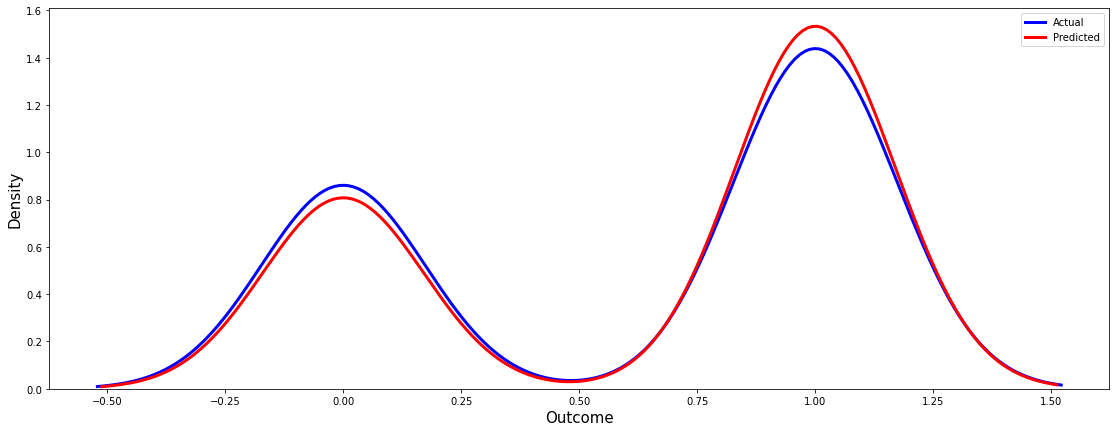

In [10]:
plt.figure(figsize = (19, 7))
sns.kdeplot(x = y_test, label = "Actual", linewidth = 3, color = "blue")
sns.kdeplot(y_pred, label = "Predicted", linewidth = 3, color = "red")
plt.xlabel("Outcome", size = 15)
plt.ylabel("Density", size = 15)
plt.legend()
plt.show()

In [11]:
# Confusion Matrix
print(confusion_matrix(y_test, y_pred))

[[ 59   5]
 [  0 107]]


In [12]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        64
           1       0.96      1.00      0.98       107

    accuracy                           0.97       171
   macro avg       0.98      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



**Import Liver Cancer Dataset**

In [13]:
liver = pd.read_csv("ILPD.csv")
liver[::100]

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
100,27,Male,0.6,0.2,161,27,28,3.7,1.6,0.76,2
200,49,Male,0.6,0.1,218,50,53,5.0,2.4,0.90,1
300,58,Male,0.8,0.2,180,32,25,8.2,4.4,1.10,2
400,66,Female,0.7,0.2,162,24,20,6.4,3.2,1.00,2
500,70,Male,2.7,1.2,365,62,55,6.0,2.4,0.60,1


In [14]:
# Create Dummy Variables
liver = pd.get_dummies(liver)

In [15]:
# Drop Null Values
liver = liver.dropna()

In [16]:
# Features
X = liver[liver.columns.drop("is_patient")]

# Target
y = liver["is_patient"]

**Find Best Parameters**

In [17]:
# Split Data into train and test
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 5)

# Decision Tree Classification Object
dt = DecisionTreeClassifier(random_state = 21)

# Parameters
parameters = {"criterion": ["gini", "entropy"],
              "max_depth": np.arange(1, 10),
              "min_samples_leaf": np.linspace(0, 1, 110)}

# Grid Search Cross Validation Object
cv = GridSearchCV(dt, parameters, cv = 3)

# Put Training Data into Model 
cv.fit(x_train, y_train)

# Best Parameters and Accuracy 
print("Best CV Parameters =", cv.best_params_)
print("Best CV Accuracy =", cv.best_score_)

Best CV Parameters = {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 0.009174311926605505}
Best CV Accuracy = 0.7135802469135802


In [18]:
# Decision Tree Classification Object
dt = DecisionTreeClassifier(criterion = "gini",
                            max_depth = 1,
                            min_samples_leaf = 0.009)

# Instactiate Adaboost Classifier
adb_clf = AdaBoostClassifier(base_estimator = dt,
                             n_estimators = 100)

# Fit Training Data
adb_clf.fit(x_train, y_train)

# Prediction
y_pred = adb_clf.predict(x_test)

# Accuracy
score = accuracy_score(y_test, y_pred)
print("Accuracy Score of Model =", score)

Accuracy Score of Model = 0.6896551724137931


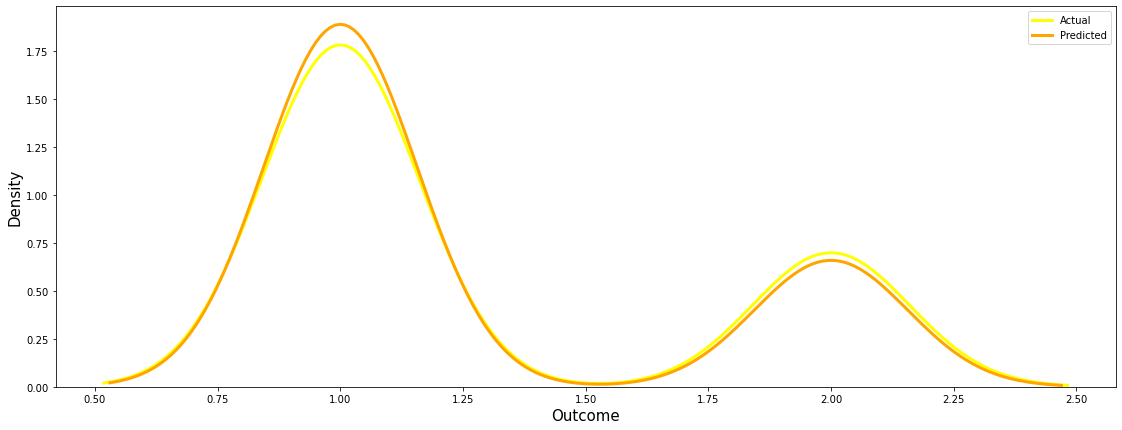

In [19]:
plt.figure(figsize = (19, 7))
sns.kdeplot(x = y_test, label = "Actual", linewidth = 3, color = "yellow")
sns.kdeplot(y_pred, label = "Predicted", linewidth = 3, color = "orange")
plt.xlabel("Outcome", size = 15)
plt.ylabel("Density", size = 15)
plt.legend()
plt.show()

In [20]:
# Confusion Matrix
print(confusion_matrix(y_test, y_pred))

[[100  25]
 [ 29  20]]


In [21]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.78      0.80      0.79       125
           2       0.44      0.41      0.43        49

    accuracy                           0.69       174
   macro avg       0.61      0.60      0.61       174
weighted avg       0.68      0.69      0.69       174



# Gradient Boosting

**Import Auto Dataset**

In [36]:
auto = pd.read_csv("auto.csv")
auto[::50]

,mpg,displ,hp,weight,accel,origin,size
0,18.0,250.0,88,3139,14.5,US,15.0
50,12.0,383.0,180,4955,11.5,US,20.0
100,20.0,130.0,102,3150,15.7,Europe,10.0
150,13.0,350.0,165,4274,12.0,US,20.0
200,19.0,232.0,90,3211,17.0,US,15.0
250,20.0,198.0,95,3102,16.5,US,15.0
300,18.0,121.0,112,2933,14.5,Europe,10.0
350,13.0,302.0,130,3870,15.0,US,20.0


In [37]:
# Instantiate Dummy Variables
auto = pd.get_dummies(auto)

In [38]:
# Features
X = auto[auto.columns.drop("size")]

# Target
y = auto["size"]

In [39]:
# Split Data into Train and Test Set
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 1)

# Instantiate a Gradient Boosting Regressor object
gbr = GradientBoostingRegressor()

# Parameters Range
parameters = {"n_estimators": np.arange(1, 50),
              "max_depth": np.arange(1, 10)}

# Grid Search Cross Validation
cv = GridSearchCV(gbr, parameters, cv = 3)

# Fit cv to training set
cv.fit(x_train, y_train)

# Best Parameters and Accuracy
print("Best Parameters =", cv.best_params_)
print("Best Accuracy =", cv.best_score_)

Best Parameters = {'max_depth': 9, 'n_estimators': 44}
Best Accuracy = 0.9612271581514481


In [40]:
# Instantiate a Gradient Boosting Regressor object
gbr = GradientBoostingRegressor(max_depth = 9, n_estimators = 44)

# Fit Training Data
gbr.fit(x_train, y_train)

# Predict Test Set Labels
y_pred = gbr.predict(x_test)

# Evaluate test set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print Result
print("Test Set RMSE =", rmse_test)

Test Set RMSE = 0.9020812835809389


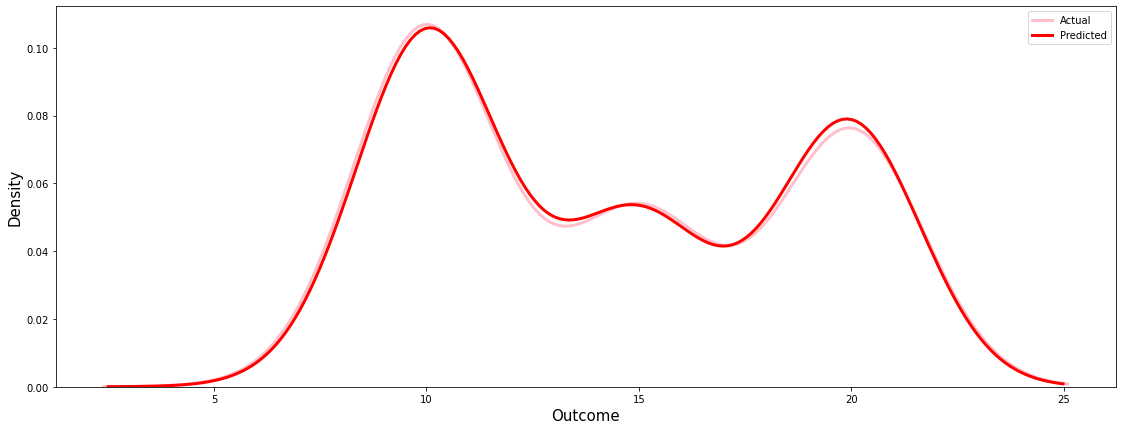

In [41]:
plt.figure(figsize = (19, 7))
sns.kdeplot(x = y_test, label = "Actual", linewidth = 3, color = "pink")
sns.kdeplot(y_pred, label = "Predicted", linewidth = 3, color = "red")
plt.xlabel("Outcome", size = 15)
plt.ylabel("Density", size = 15)
plt.legend()
plt.show()

# Stochastic Gradient Boosting

In [49]:
# Stochastic Gradient Boosting Object
sgbt = GradientBoostingRegressor(max_depth = 1,
                                 subsample = 0.8,
                                 max_features = 0.2,
                                 n_estimators = 300,
                                 random_state = 1)

# Fit Training Data into Model
sgbt.fit(x_train, y_train)

# Prediction
y_pred = sgbt.predict(x_test)

# Evaluate Test Set RMSE
rmse_test = MSE(y_test, y_pred)**(1/2)

# Print Score
print("RMSE =", rmse_test)

RMSE = 1.0304658325355134


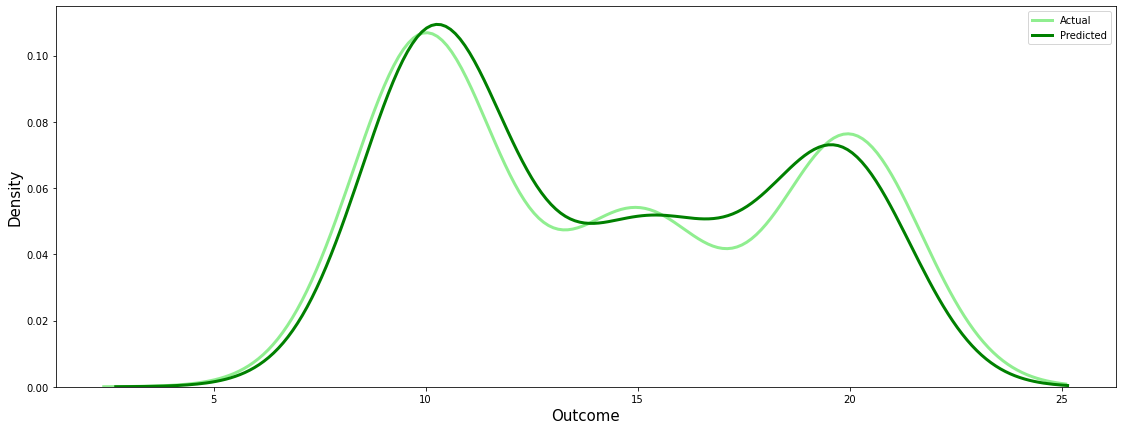

In [50]:
plt.figure(figsize = (19, 7))
sns.kdeplot(x = y_test, label = "Actual", linewidth = 3, color = "lightgreen")
sns.kdeplot(y_pred, label = "Predicted", linewidth = 3, color = "green")
plt.xlabel("Outcome", size = 15)
plt.ylabel("Density", size = 15)
plt.legend()
plt.show()